# Text Extraction of the A-OCR Entomology

#### A-OCR Entomology collection: 100 images, 1132 lines.
OCRopus, Tesseract, and the Google Cloud Platform OCR (G-OCR) were run on these lines<br>
<br>
The previously OCR-ed lines are in:<br>
<font color=blue>
~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt<br>
~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt<br>
~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt<br>
</font><br>

## 1. Accept lines (Majority voting)
These lines will be considered to be correctly extracted.
### Criterium:
- The 3 OCRs generated the same value.
- 2 OCRs generated the same value and have a high average confidence (Avg.Prob. > 0.9)

The file **accepted.tsv** is created.

In [88]:
RESULTS_DIR = "~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/"
N_LINES = float(1132)

In [90]:
%%time
%run ~/Spring2019/ALOT/getLinesAccepted.py -i1 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt_prob -i2 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt_prob -i3 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/accepted.tsv

CPU times: user 120 ms, sys: 16 ms, total: 136 ms
Wall time: 137 ms


First 5 lines of the **accepted.tsv** file are shown. Spaces are not included in the output.

In [91]:
import pandas as pd
df_accepted = pd.read_csv( RESULTS_DIR + "accepted.tsv", sep='\t', header=None)
df_accepted.head()

,0,1,2,3,4,5
0,EMEC609488_Cerceris_compacta_001.prob,12,0.953424,0.992526,0.993333,U.C.Berkeley
1,EMEC609488_Cerceris_compacta_003.prob,9,0.907099,0.990486,0.934444,10km.W.of
2,EMEC609488_Cerceris_compacta_004.prob,10,0.639588,0.989361,0.990000,"Zitacuaro,"
3,EMEC609488_Cerceris_compacta_008.prob,9,0.992537,0.995612,0.995556,Collector
4,EMEC609488_Cerceris_compacta_009.prob,8,0.587711,0.988849,0.992500,Cerceris


In [92]:
n_a = len(df_accepted.index)
print("Number of accepted lines: " + str(n_a) + " (" + "{0:.2f}".format(100.0*(n_a/N_LINES)) + "%)")

Number of accepted lines: 568 (50.18%)



## 2. Perfect match lines: to be used on support structures
These are lines where OCRopus, Tesseract, and G-OCR returned exactly the same value. In the comparison, I am not considering blank spaces. I still need to improve this because procedure because it is inserting invalid n-grams (**TO-DO**)

The file **match3.tsv** is created.

In [93]:
%%time
%run ~/Spring2019/ALOT/getLinesAccepted_Match3.py -i1 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt_prob -i2 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt_prob -i3 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/match3.tsv

CPU times: user 72 ms, sys: 48 ms, total: 120 ms
Wall time: 121 ms


In [94]:
df_match3 = pd.read_csv( RESULTS_DIR + "match3.tsv", sep='\t', header=None)
df_match3.head()

,0,1,2,3,4,5
0,EMEC609488_Cerceris_compacta_001.prob,12,0.953424,0.992526,0.993333,U.C.Berkeley
1,EMEC609488_Cerceris_compacta_008.prob,9,0.992537,0.995612,0.995556,Collector
2,EMEC609488_Cerceris_compacta_012.prob,11,0.948402,0.989286,0.945455,H.A.Scullen
3,EMEC609504_Cerceris_compacta_006.prob,8,0.987015,0.992528,0.925000,P.D.Hurd
4,EMEC609515_Cerceris_compacta_009.prob,7,0.890164,0.982435,0.861429,7-17-32


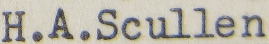

In [95]:
import os
from IPython.display import Image
Image(filename="/home/ialzuru/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_img/EMEC609563_Cerceris_compacta_011.jpg")

In [96]:
n_m = len(df_match3.index)
print("Number of match3 lines: " + str(n_m) + " (" + "{0:.2f}".format(100.0*(n_m/N_LINES)) + "%)")

Number of match3 lines: 227 (20.05%)



## 3. Rejected lines.
These lines are not going to be considered for further processing or improvement (but they will be part of the final extracted data). Files (lines) are rejected if:
- None of the OCRs generated any output, or
- Only one of the OCRs generated some output and this output has less than 4 characters or its average confidence is less than 0.7

The file **rejected3.tsv** is created.

In [97]:
%%time
%run ../ALOT/getLinesRejected.py -i0 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_img -i1 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt_prob -i2 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt_prob -i3 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/rejected.tsv

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 16.1 ms


In [98]:
df_rejected = None
try:
    df_rejected = pd.read_csv( RESULTS_DIR + "rejected.tsv", sep='\t', header=None)
except pd.io.common.EmptyDataError:
    df_rejected = pd.DataFrame()
df_rejected.tail()

""


In [99]:
n_r = len(df_rejected.index)
print("Number of rejected lines: " + str(n_r) + " (" + "{0:.2f}".format(100.0*(n_r/N_LINES)) + "%)")

Number of rejected lines: 0 (0.00%)


## 4. Data distribution in directories: imgs_match3, gr_lines, gr_lines_ocropus, gr_lines_tesseract, gr_lines_google, and match3_lines
Duplicate the original folder of lines:<br>
<font color=blue>
cp -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_img ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/lines_img
</font><br>
<br>
Move the accepted files to a separated directory:
<br>
<font color=blue>python3 ~/Spring2019/ALOT/**move_files.py** -tsv ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/accepted.tsv -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/lines_img -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_accepted</font>
<br>
We have **564** lines remaining.
<br>
<br>
The text extraction support structures will be created from the match3 images:
<br>
<font color=blue>python3 ~/Spring2019/ALOT/**move_files.py** -tsv ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/match3.tsv -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_accepted -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3</font>
<br>
<font color=blue>cp ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3/\*.jpg ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_accepted/</font>
<br><br>
The lines yet to be corrected, from each OCR, are moved to specific directories:<br>
<font color=blue>python3 ~/Spring2019/ALOT/**copy_OCR-ed_files.py** -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/lines_img -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_ocropus</font><br>
<font color=blue>python3 ~/Spring2019/ALOT/**copy_OCR-ed_files.py** -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/lines_img -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_tesseract</font><br>
<font color=blue>python3 ~/Spring2019/ALOT/**copy_OCR-ed_files.py** -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/lines_img -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_google</font><br>
<br>
<font color=blue>python3 ~/Spring2019/ALOT/**copy_OCR-ed_files.py** -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3 -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_match3</font><br>
<br>
Directory **lines_img** will contain the images (.jpg) that still need to be processed. **564** files.<br>
Directory **txt_prob_ocropus** will contain the .txt and .prob output files of OCRopus for the gr_lines. **1,128** files(**564**).<br>
Directory **txt_prob_tesseract** will contain the .txt and .prob output files of Tesseract for the gr_lines. **808** files(**404**).<br>
Directory **txt_prob_google** will contain the .txt and .prob output files of G-OCR for the gr_lines. **1,128** files(**564**).<br>
<br>
Directory **imgs_match3** will contain the images (.jpg) with perfect match. **227** files.<br>
Directory **txt_prob_match3** will contain the .txt and .prob output files of Tesseract for match3 lines. **454** files(**227**).<br>

## 5. Fix (make consistent) the text and probability files

<font color=blue>time python3 ~/Spring2019/ALOT/**fix_prob_txt_dir.py** -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_ocropus -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_ocropus_fixed > ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/report_ocropus_fixed.txt</font><br>
real	0m0.384s<br>
Total processed files: 559<br>
<br>
<font color=blue>time python3 ~/Spring2019/ALOT/**fix_prob_txt_dir.py** -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_tesseract -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_tesseract_fixed > ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/report_tesseract_fixed.txt</font><br>
real	0m0.446s<br>
Total processed files: 390<br>
<br>
<font color=blue>time python3 ~/Spring2019/ALOT/**fix_prob_txt_dir.py** -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_google -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_google_fixed > ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/report_google_fixed.txt</font><br>
real	0m0.398s<br>
Total processed files: 564<br>
<br>
<font color=blue>time python3 ~/Spring2019/ALOT/**fix_prob_txt_dir.py** -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_match3 -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_match3_fixed > ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/report_match3_fixed.txt</font><br>
real	0m0.334s<br>
Total processed files: 227<br>

## 6. Construction of the n-grams (1-grams, 2-grams) files

In [100]:
%%time
%run ~/Spring2019/ALOT/get_n_grams.py -d ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_match3_fixed -n 1 -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/1_gram.tsv

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 11.2 ms


In [101]:
%%time
%run ~/Spring2019/ALOT/get_n_grams.py -d ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_match3_fixed -n 2 -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/2_gram.tsv

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.9 ms


## 7. Construction of the descriptive stats files (per OCR)

In [102]:
%%time
%run ~/Spring2019/ALOT/copy_OCR-ed_files.py -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3 -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/ocropus/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_ocropus
%run ~/Spring2019/ALOT/copy_OCR-ed_files.py -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3 -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/tesseract/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_tesseract
%run ~/Spring2019/ALOT/copy_OCR-ed_files.py -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_match3 -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_google

CPU times: user 28 ms, sys: 52 ms, total: 80 ms
Wall time: 83.7 ms


This generated 3 new folders: **matched3_ocropus**, **matched3_tesseract**, and **matched3_google**, with 450 files each of them.

In [103]:
%%time
%run ~/Spring2019/ALOT/get_stats_from_probs.py -d ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_ocropus -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/ocropus_symbols_stats.txt
%run ~/Spring2019/ALOT/get_stats_from_probs.py -d ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_tesseract -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/tesseract_symbols_stats.txt
%run ~/Spring2019/ALOT/get_stats_from_probs.py -d ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/matched3_google -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/google_symbols_stats.txt

CPU times: user 2.19 s, sys: 0 ns, total: 2.19 s
Wall time: 2.19 s


The 3 files with the statistics for every symbol in every OCR are built: **ocropus_symbols_stats.txt**, **tesseract_symbols_stats.txt**, and **google_symbols_stats.txt**<br>
They contain the symbol, mean, median, standard deviation, and number of repetitions for each symbol in the specified OCR.

In [104]:
df_stats = pd.read_csv( RESULTS_DIR + "ocropus_symbols_stats.txt", sep='\t', header=None)
df_stats.head()

,0,1,2,3,4
0,T,0.965654,0.997987,0.064890,8
1,i,0.983977,0.991416,0.041287,99
2,m,0.989314,0.988762,0.003813,35
3,b,0.986289,0.986751,0.005355,16
4,e,0.981544,0.986747,0.024711,341


## 8. Augment the confidence values using the n-grams
+3 to the characters in 2-grams<br>
+1 to the characters in 1-grams<br>
<br>
Adapt the addresses, internally, in the augmentation augment_prob_ngrams.py algorithm:<br>
<font color="blue">
path_filename_2g = "/home/ialzuru/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/2_gram.tsv"<br>
path_filename_1g = "/home/ialzuru/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/1_gram.tsv"
</font>

In [1]:
%%time
%run ~/Spring2019/ALOT/augment_prob_ngrams.py -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_ocropus_fixed -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/ocropus_augmented

Probability augmented in 54 files.
CPU times: user 236 ms, sys: 36 ms, total: 272 ms
Wall time: 404 ms


In [2]:
%%time
%run ~/Spring2019/ALOT/augment_prob_ngrams.py -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_tesseract_fixed -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/tesseract_augmented

Probability augmented in 122 files.
CPU times: user 64 ms, sys: 16 ms, total: 80 ms
Wall time: 209 ms


In [3]:
%%time
%run ~/Spring2019/ALOT/augment_prob_ngrams.py -sd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/txt_prob_google_fixed -dd ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/google_augmented

Probability augmented in 177 files.
CPU times: user 92 ms, sys: 28 ms, total: 120 ms
Wall time: 278 ms


The three just created directories: **ocropus_augmented**, **tesseract_augmented**, and **google_augmented**, will be the directories used during the lines correction process.

## 9. Correct lines -> Accept/Reject
An **Accepted** line means we are confident that it is entirely correct.<br>
**Reject** means: After correcting the line, we do not have a high confidence about part or all the extracted text.<br>
<br>
In the accept_from_ngrams.py file, update the addresses of the symbols' statistics files:<br>
<font color=blue>
fname_ocropus_stats = "~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/ocropus_symbols_stats.txt"		# OCR 1<br>
fname_tesseract_stats = "~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/tesseract_symbols_stats.txt"	# OCR 2<br>
fname_google_stats = "~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/google_symbols_stats.txt"			# OCR 3<br>
</font>

<font color=blue>time python3 ~/Spring2019/ALOT/**accept_from_ngrams.py** -i1 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/ocropus_augmented -i2 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/tesseract_augmented -i3 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/google_augmented -da ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/corrected_accepted -dr ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/corrected_rejected</font>

real	0m2.361s

Directories **corrected_accepted** and **corrected_rejected** were created.<br>
Correct_accepted: 286 files, **143** lines (12.63%).<br>
Correct_rejected: 832 files, **416** lines (36.75%).<br>

## 10. Final organization of the lines, before generating the new labels.
We put together in the directory **final_txt_prob** the accepted and corrected lines.<br>
The accepted lines include the first group (accepted through majority voting) and the lines accepted after correction.<br>
The lines rejected in the first process are not included, because no OCR generated any value or only one of them did.

In [4]:
%%time
%run ~/Spring2019/ALOT/copy_OCR-ed_files.py -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/imgs_accepted -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/google/lines_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/final_txt_prob

CPU times: user 84 ms, sys: 88 ms, total: 172 ms
Wall time: 638 ms


cp ./corrected_accepted/&ast; ./final_txt_prob/<br>
cp ./corrected_rejected/&ast; ./final_txt_prob/<br>
ls ./final_txt_prob/ | wc -l<br>
2,254 files -> **1,127** lines<br>

## 11. Construction of the labels (fulltext) from the extracted lines

<font color=blue>time python3 ~/Spring2019/ALOT/**build_labels.py** -r ~/Spring2019/H-MaTE/biocolls/aocr_entomology/images -i ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/final_txt_prob -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/final_labels</font><br>
real	0m0.343s

## 12. Similarity comparison to the Golden Truth data

In [5]:
%%time
%run ~/Spring2019/ALOT/fulltext_similarity_DL_dir.py -d1 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/gt -d2 ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/final_labels -o ~/Spring2019/H-MaTE/biocolls/aocr_entomology/H-MaTE/aocr_entomology_hmate_vs_gt.csv

CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 102 ms
